In [12]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Data Preprocessing
# One-hot encode the 'Type' column
data = pd.get_dummies(data, columns=['Type'])

# Assuming 'Failure Type' is the target variable
X = data.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
y = data['Failure Type']  # Target variable

In [15]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
# Using Random Forest as an example model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature Importance
feature_importance = model.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {X.columns[i]}: {importance}")

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Feature Importance:
Feature Air temperature [K]: 0.03599343199747607
Feature Process temperature [K]: 0.0635980431736747
Feature Rotational speed [rpm]: 0.27777536861199864
Feature Torque [Nm]: 0.30061170971654494
Feature Tool wear [min]: 0.30730193624347524
Feature Type_H: 0.0008167304093530239
Feature Type_L: 0.007873946529458423
Feature Type_M: 0.00602883331801881

Accuracy: 0.975609756097561


In [16]:
# Prediction and Failure Check
# Assuming you want to predict for a specific product ID (e.g., 'M14860')
# You can pass the corresponding feature values for prediction
product_to_check = data[data['Product ID'] == 'M14860'].drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
prediction = model.predict(product_to_check)
if 'Yes' in prediction:  # Assuming 'Yes' indicates failure
    print("Product ID M14860 has a failure.")
else:
    print("Product ID M14860 does not have a failure.")

Product ID M14860 does not have a failure.


In [17]:
# Model Training
# Using Random Forest as an example model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature Importance
feature_importance = model.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {X.columns[i]}: {importance}")


Feature Importance:
Feature Air temperature [K]: 0.04715798556381033
Feature Process temperature [K]: 0.05120894780036757
Feature Rotational speed [rpm]: 0.2682323107540346
Feature Torque [Nm]: 0.3238754291679972
Feature Tool wear [min]: 0.2896617818244652
Feature Type_H: 0.0017276986593706006
Feature Type_L: 0.012345666580511458
Feature Type_M: 0.00579017964944295


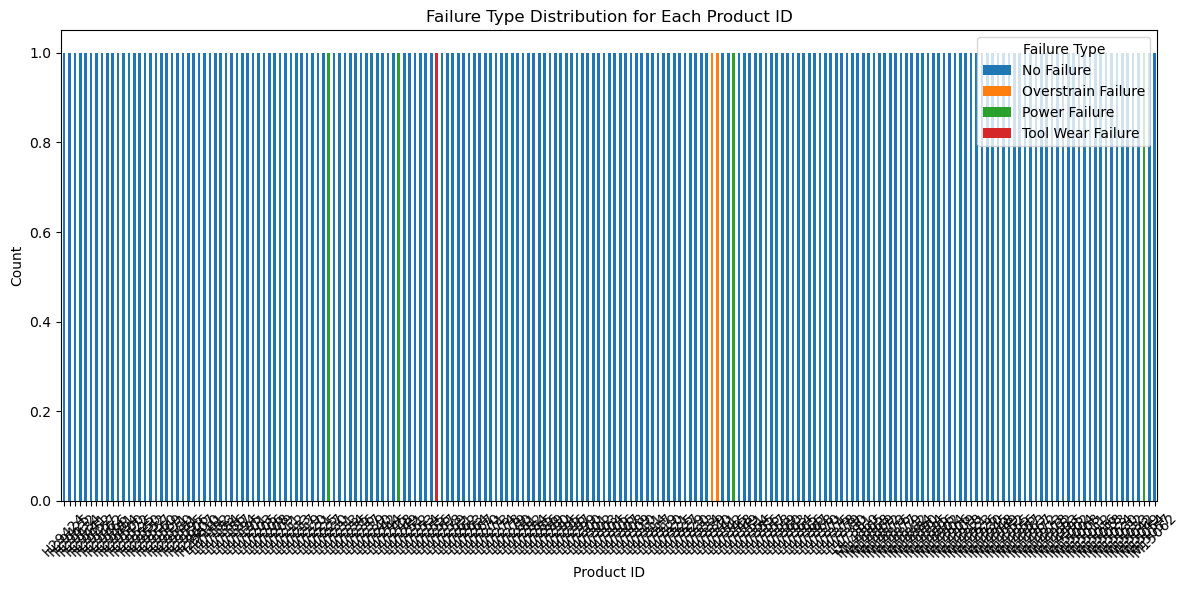

In [18]:
# Visualization
# Group data by Product ID and Failure Type and count occurrences
failure_counts = data.groupby(['Product ID', 'Failure Type']).size().unstack(fill_value=0)

# Plotting
failure_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Failure Type Distribution for Each Product ID')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.legend(title='Failure Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
class QLearningAgent:
    def __init__(self, num_actions, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_values = {}

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_actions)
        else:
            return np.argmax(self.q_values.get(state, np.zeros(self.num_actions)))

    def update(self, state, action, reward, next_state):
        current_q_value = self.q_values.get(state, np.zeros(self.num_actions))[action]
        max_next_q_value = np.max(self.q_values.get(next_state, np.zeros(self.num_actions)))
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * max_next_q_value - current_q_value)
        self.q_values.setdefault(state, np.zeros(self.num_actions))[action] = new_q_value

    def print_q_values(self):
        print("Q-values:")
        for state, q_values in self.q_values.items():
            print(f"State: {state}, Q-values: {q_values}")


# Initialize Q-learning Agent
num_possible_actions = 2  # Assuming two possible actions: predict failure or not
agent = QLearningAgent(num_actions=num_possible_actions)

# RL training loop
env = MaintenanceEnvironment(predictive_model=None)  # Initialize environment without predictive model
num_episodes = 100  # Define num_episodes
max_steps_per_episode = 100  # Define the maximum number of steps per episode

for episode in range(num_episodes):
    state = env.reset(product_id='M14860')  # Initialize state
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Choose action based on RL policy
        action = agent.select_action(state)

        # Take action and observe reward
        reward = env.step(action)

        # Update Q-values
        next_state = state  # Use the same state as next_state
        agent.update(state, action, reward, next_state)

        total_reward += reward

        if env.failure_predicted:
            break  # Stop episode if failure is predicted

        state = next_state  # Update state for the next step
    
    # Print Q-values at the end of each episode
    agent.print_q_values()


Q-values:
State: None, Q-values: [92.48803863 20.93104823]
Q-values:
State: None, Q-values: [174.77241002  64.46815115]
Q-values:
State: None, Q-values: [251.84499515  92.30158992]
Q-values:
State: None, Q-values: [316.26859878 227.56009094]
Q-values:
State: None, Q-values: [378.26272221 281.67070936]
Q-values:
State: None, Q-values: [434.63582059 328.28577368]
Q-values:
State: None, Q-values: [486.41165631 378.40741054]
Q-values:
State: None, Q-values: [533.91243488 417.05189364]
Q-values:
State: None, Q-values: [576.17272889 474.98781747]
Q-values:
State: None, Q-values: [614.98666858 517.3862095 ]
Q-values:
State: None, Q-values: [649.89593843 567.37114944]
Q-values:
State: None, Q-values: [682.59410003 585.60185476]
Q-values:
State: None, Q-values: [711.95034917 617.2608177 ]
Q-values:
State: None, Q-values: [737.54324306 674.99437804]
Q-values:
State: None, Q-values: [761.34027294 705.82867711]
Q-values:
State: None, Q-values: [783.63002956 719.82626452]
Q-values:
State: None, Q-v